In [49]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [37]:
df_1 = pd.read_parquet(r"E:\mlops-marathon\mlops-mara-sample-public\data\raw_data\phase-1\prob-1\raw_train.parquet")

In [38]:
df_1.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,label,feature14,feature15,feature16
0,Site engineer,grocery_pos,8.60,48230,40.213439,-85.203756,47583,42.508293,-83.168004,65.596062,3,5,1,1,8.017865,1.028822,58.911132
1,Site engineer,gas_transport,316.84,48230,44.379391,-82.859721,47583,42.661838,-81.966510,64.728795,6,5,1,1,11.768568,1.106217,64.431017
2,Site engineer,grocery_pos,294.89,48230,42.950657,-84.935542,47583,42.580470,-82.408529,65.434606,3,5,1,1,7.996359,0.899881,57.545348
3,Site engineer,shopping_net,831.08,48230,39.372111,-84.893973,47583,41.948688,-83.919881,64.990422,23,6,1,1,8.767720,1.062966,62.681169
4,Site engineer,health_fitness,1063.84,48230,41.227499,-83.228392,47583,41.544743,-82.123365,65.316083,23,6,1,1,8.816222,0.722446,63.084486


In [65]:
train_x_path = r"E:\mlops-marathon\mlops-mara-sample-public\data\train_data\phase-1\prob-1\train_x.parquet"
train_y_path = r"E:\mlops-marathon\mlops-mara-sample-public\data\train_data\phase-1\prob-1\train_y.parquet"

train_x = pd.read_parquet(train_x_path)
train_y = pd.read_parquet(train_y_path)

test_x_path = r"E:\mlops-marathon\mlops-mara-sample-public\data\train_data\phase-1\prob-1\test_x.parquet"
test_y_path = r"E:\mlops-marathon\mlops-mara-sample-public\data\train_data\phase-1\prob-1\test_y.parquet"

test_x = pd.read_parquet(test_x_path)
test_y = pd.read_parquet(test_y_path)

In [66]:
train_x

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16
0,337,0,138.71,44121,39.354345,-83.372015,769341,41.359975,-80.587306,78.529290,10,1,1,6.406360,0.284834,67.097437
1,365,12,6.51,66442,35.920414,-98.480588,14283,39.439880,-96.938809,45.234461,18,2,2,6.800447,0.779245,66.892996
2,184,6,3.34,42071,36.155589,-88.412050,29655,37.220467,-88.393033,43.063620,22,2,2,8.342428,0.603699,66.288586
3,390,4,180.17,30067,31.949179,-82.265798,302309,33.430411,-84.920539,26.093487,0,3,1,8.697487,0.472254,63.834991
4,365,10,8.92,66442,40.881803,-99.983715,14283,38.770383,-95.877356,44.831443,16,5,2,6.544843,0.429824,62.746348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107355,288,11,89.36,92663,31.949042,-119.572855,62946,32.972526,-118.249519,26.573826,19,6,1,7.548109,0.448483,68.799775
107356,122,0,66.18,74115,35.039883,-98.245389,413574,36.290567,-95.090935,43.878081,17,4,2,8.574051,0.628681,67.981761
107357,340,7,22.84,63376,39.079630,-93.622469,70828,39.334027,-89.707495,37.770242,18,0,2,8.802872,0.485503,60.968425
107358,53,11,8.76,17402,45.598813,-74.124889,175624,40.403708,-77.370124,38.854136,14,3,1,7.618088,0.375221,64.368603


0 %  93.62
1 %     6.38


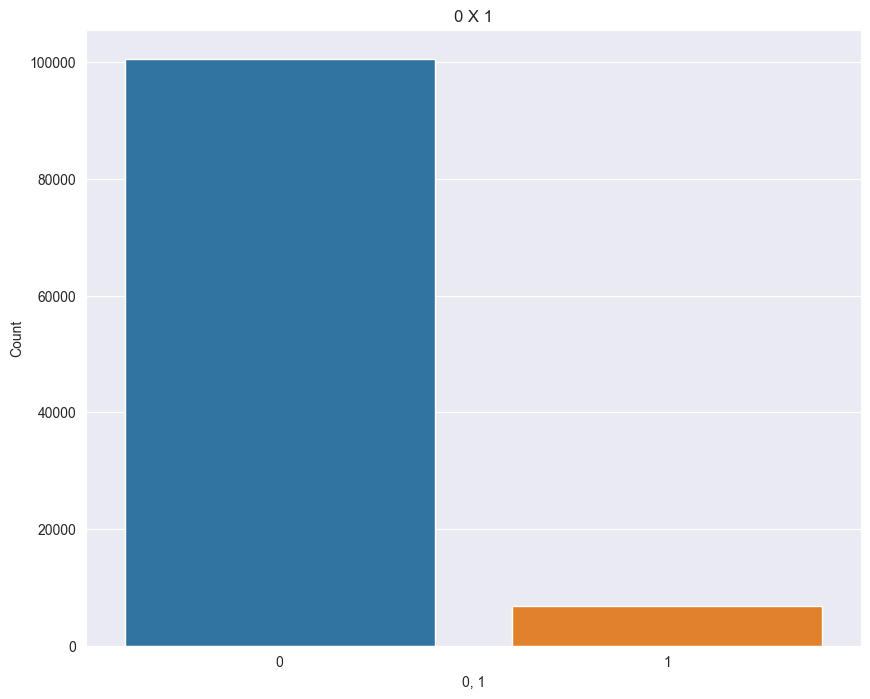

In [67]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=train_y.label.value_counts().index,y=train_y.label.value_counts())
plt.title('0 X 1')
plt.ylabel('Count')
plt.xlabel('0, 1')
print ('0 % ',round(train_y.label.value_counts()[0]/len(train_y.label)*100,2))
print ('1 %    ',round(train_y.label.value_counts()[1]/len(train_y.label)*100,2))

In [5]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()


test_x  = test_x .to_numpy()
test_y  = test_y.to_numpy()

In [68]:
# The function "len" counts the number of classes = 1 and saves it as an object "fraud_records"
fraud_records = len(train_y[train_y.label == 1]) 

# Defines the index for fraud and non-fraud in the lines:
fraud_indices = train_y[train_y.label == 1].index
normal_indices = train_y[train_y.label == 0].index

# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(normal_indices, fraud_records, False)
df_undersampled = df_1.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = train_x.iloc[:,1:30]
Y_undersampled = train_y.label
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

# X_undersampled_train = X_undersampled_train.drop(["label", "feature2"], axis=1)
# X_undersampled_test =X_undersampled_test.drop(["label", "feature2"], axis=1)

In [69]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

xg_undersampled = xgb.XGBClassifier() 
cmat, pred = RunModel(xg_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)

In [71]:
auc_score = roc_auc_score(Y_undersampled_test, pred )
metrics = {"test_auc": auc_score}
metrics

{'test_auc': 0.9655113734456403}

In [72]:
print (classification_report(Y_undersampled_test, pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30135
           1       0.97      0.93      0.95      2073

    accuracy                           0.99     32208
   macro avg       0.98      0.97      0.97     32208
weighted avg       0.99      0.99      0.99     32208

